In [16]:
import asdf
import numpy as np
import matplotlib.pyplot as plt
import orientations as ori

In [17]:
m12f_data = asdf.open("disk_lmc_alignment_m12f_res7100.asdf")
m12i_data = asdf.open("disk_lmc_alignment_m12i_res7100.asdf")
m12m_data = asdf.open("disk_lmc_alignment_m12m_res7100.asdf")
m12w_data = asdf.open("disk_lmc_alignment_m12w_res7100.asdf")

m12f_time = ori.getSnapshotData(
    "../../../data/latte_metaldiff/m12i_res7100/", np.array(m12f_data["snapshot"])
)[0]
m12i_time = ori.getSnapshotData(
    "../../../data/latte_metaldiff/m12i_res7100/", np.array(m12i_data["snapshot"])
)[0]
m12m_time = ori.getSnapshotData(
    "../../../data/latte_metaldiff/m12i_res7100/", np.array(m12m_data["snapshot"])
)[0]
m12w_time = ori.getSnapshotData(
    "../../../data/latte_metaldiff/m12i_res7100/", np.array(m12w_data["snapshot"])
)[0]


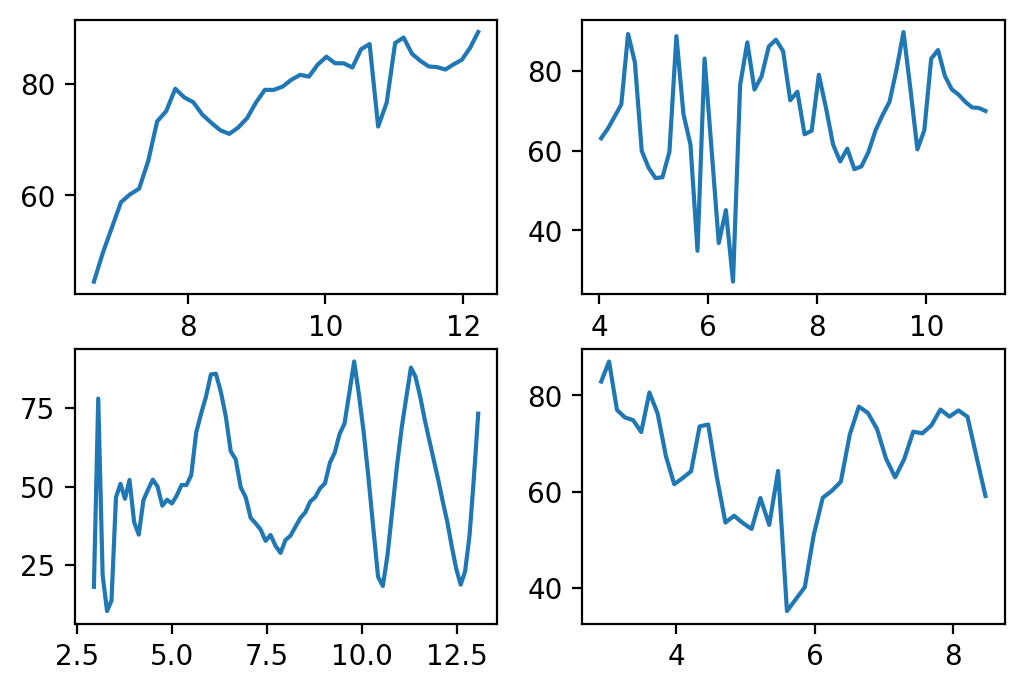

In [20]:
fig, ax = plt.subplots(2, 2, dpi=200)
ax[0, 0].plot(m12f_time, m12f_data["angle"])
ax[0, 1].plot(m12i_time, m12i_data["angle"])
ax[1, 0].plot(m12m_time, m12m_data["angle"])
ax[1, 1].plot(m12w_time, m12w_data["angle"])